In [1]:
# EDA pamages 
import pandas as pd

#hide earrings 
import warnings
warnings.filterwarnings('ignore')

from textblob import TextBlob

from pandas.io.json import json_normalize

from collections import Counter 

# Data Viz pakages
import matplotlib.pyplot as plt
import seaborn as sns

#pip install wordcloud
from wordcloud import WordCloud

''' here i am importing the cleaning package and the package
    library is intended to solve the problems of
    1)Cleaning unstructured text data.
    2)Reducing noise in text.
    3)Avoid repetition of the same code for pre-processing.'''
import neattext as nfx

plt.style.use('seaborn')

In [2]:
#load data
df = pd.read_csv(r'C:\Users\Admin\Downloads\news\news.csv')

In [3]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [7]:
# the whole dataset is converted into lowercase()
df=df.apply(lambda x: x.astype(str).str.lower()) 

In [8]:
df

,title,text,label
0,you can smell hillary’s fear,"daniel greenfield, a shillman journalism fello...",fake
1,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,fake
2,kerry to go to paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...,real
3,bernie supporters on twitter erupt in anger ag...,"— kaydee king (@kaydeeking) november 9, 2016 t...",fake
4,the battle of new york: why this primary matters,it's primary day in new york and front-runners...,real
...,...,...,...
6330,state department says it can't find emails fro...,the state department told the republican natio...,real
6331,the ‘p’ in pbs should stand for ‘plutocratic’ ...,the ‘p’ in pbs should stand for ‘plutocratic’ ...,fake
6332,anti-trump protesters are tools of the oligarc...,anti-trump protesters are tools of the oligar...,fake
6333,"in ethiopia, obama seeks progress on peace, se...","addis ababa, ethiopia —president obama convene...",real


In [9]:
dir(nfx)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [10]:
'''here i define function with two variables to get difference of previous and new columns
afterwards i cleaned all unwantEd thkings fROM data such as below '''
def get_clean_data_column (new_column_name , column_name ):
    df[new_column_name] = df[column_name].apply(nfx.remove_emojis)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_numbers)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_punctuations)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_special_characters)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_multiple_spaces)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_stopwords)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_urls)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_visacard_addr)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_terms_in_bracket)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_street_address)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_puncts)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_postoffice_box)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_phone_numbers)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_html_tags)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_currency_symbols)
    return df[new_column_name]

In [11]:
'''here i made a dictionary in which i gave the names of new and previous columns '''
dict_names ={'News':'text'}
#this the loop in dictionary 
for i ,j in dict_names.items():
    #here i m call my custom function to clean the dataset
    get_clean_data_column(i,j)

In [12]:
df

,title,text,label,News
0,you can smell hillary’s fear,"daniel greenfield, a shillman journalism fello...",fake,daniel greenfield shillman journalism fellow f...
1,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,fake,google pinterest digg linkedin reddit stumbleu...
2,kerry to go to paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...,real,secretary state john f kerry said monday stop ...
3,bernie supporters on twitter erupt in anger ag...,"— kaydee king (@kaydeeking) november 9, 2016 t...",fake,kaydee king kaydeeking november lesson tonight...
4,the battle of new york: why this primary matters,it's primary day in new york and front-runners...,real,primary day new york frontrunners hillary clin...
...,...,...,...,...
6330,state department says it can't find emails fro...,the state department told the republican natio...,real,state department told republican national comm...
6331,the ‘p’ in pbs should stand for ‘plutocratic’ ...,the ‘p’ in pbs should stand for ‘plutocratic’ ...,fake,p pbs stand plutocratic pentagon posted oct wi...
6332,anti-trump protesters are tools of the oligarc...,anti-trump protesters are tools of the oligar...,fake,antitrump protesters tools oligarchy reform pr...
6333,"in ethiopia, obama seeks progress on peace, se...","addis ababa, ethiopia —president obama convene...",real,addis ababa ethiopia president obama convened ...


In [13]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0 :
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Natural'
    result = {'Polarity':sentiment_polarity,
            'Subjectivity':sentiment_subjectivity,
            'Sentiment':sentiment_label}
    return result

In [14]:
df["sentiment_result"] = df["News"].apply(get_sentiment)

In [15]:
df['sentiment_result']

0       {'Polarity': 0.03773172905525848, 'Subjectivit...
1       {'Polarity': 0.09696969696969697, 'Subjectivit...
2       {'Polarity': 0.04855769230769232, 'Subjectivit...
3       {'Polarity': 0.061270871985157696, 'Subjectivi...
4       {'Polarity': 0.29235537190082644, 'Subjectivit...
                              ...                        
6330    {'Polarity': -0.027559523809523805, 'Subjectiv...
6331    {'Polarity': 0.016122965318509874, 'Subjectivi...
6332    {'Polarity': 0.013405619537695005, 'Subjectivi...
6333    {'Polarity': 0.05116297636789439, 'Subjectivit...
6334    {'Polarity': 0.04061345158906134, 'Subjectivit...
Name: sentiment_result, Length: 6335, dtype: object

In [16]:
df = df.join(pd.json_normalize(df['sentiment_result']))

In [17]:
df

,title,text,label,News,sentiment_result,Polarity,Subjectivity,Sentiment
0,you can smell hillary’s fear,"daniel greenfield, a shillman journalism fello...",fake,daniel greenfield shillman journalism fellow f...,"{'Polarity': 0.03773172905525848, 'Subjectivit...",0.037732,0.595863,Positive
1,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,fake,google pinterest digg linkedin reddit stumbleu...,"{'Polarity': 0.09696969696969697, 'Subjectivit...",0.096970,0.558333,Positive
2,kerry to go to paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...,real,secretary state john f kerry said monday stop ...,"{'Polarity': 0.04855769230769232, 'Subjectivit...",0.048558,0.307051,Positive
3,bernie supporters on twitter erupt in anger ag...,"— kaydee king (@kaydeeking) november 9, 2016 t...",fake,kaydee king kaydeeking november lesson tonight...,"{'Polarity': 0.061270871985157696, 'Subjectivi...",0.061271,0.531957,Positive
4,the battle of new york: why this primary matters,it's primary day in new york and front-runners...,real,primary day new york frontrunners hillary clin...,"{'Polarity': 0.29235537190082644, 'Subjectivit...",0.292355,0.380579,Positive
...,...,...,...,...,...,...,...,...
6330,state department says it can't find emails fro...,the state department told the republican natio...,real,state department told republican national comm...,"{'Polarity': -0.027559523809523805, 'Subjectiv...",-0.027560,0.362440,Negative
6331,the ‘p’ in pbs should stand for ‘plutocratic’ ...,the ‘p’ in pbs should stand for ‘plutocratic’ ...,fake,p pbs stand plutocratic pentagon posted oct wi...,"{'Polarity': 0.016122965318509874, 'Subjectivi...",0.016123,0.437766,Positive
6332,anti-trump protesters are tools of the oligarc...,anti-trump protesters are tools of the oligar...,fake,antitrump protesters tools oligarchy reform pr...,"{'Polarity': 0.013405619537695005, 'Subjectivi...",0.013406,0.342346,Positive
6333,"in ethiopia, obama seeks progress on peace, se...","addis ababa, ethiopia —president obama convene...",real,addis ababa ethiopia president obama convened ...,"{'Polarity': 0.05116297636789439, 'Subjectivit...",0.051163,0.415525,Positive


In [23]:
df['Sentiment'].value_counts()

Positive    4667
Negative    1424
Natural      244
Name: Sentiment, dtype: int64

<AxesSubplot:>

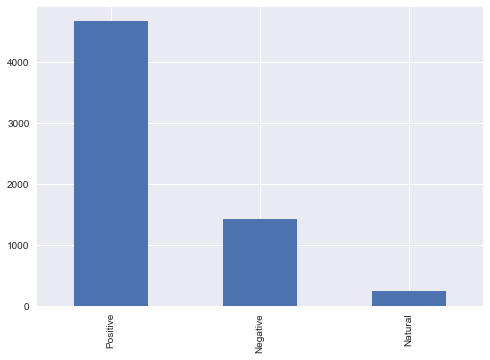

In [22]:
df['Sentiment'].value_counts().plot(kind = 'bar')

In [25]:
def get_pnn_news(name_of_pnn_news):
    pnn_news = df[df['Sentiment']==name_of_pnn_news]['News']
    return pnn_news

In [31]:
positive_news = get_pnn_news('Positive')
negative_news = get_pnn_news('Negative')
natural_News = get_pnn_news('Natural')

In [60]:
'''here i made a function to take new_column_name 
    than remove stopwords from that 
    further it converts them into list'''
def get_news_list(news_list_name):
    news_list_name = news_list_name.tolist()
    return news_list_name

In [65]:
positive_news_list = get_news_list(positive_News)
negative_news_list = get_news_list(negative_news)
natural_news_list = get_news_list(natural_News)

In [66]:
#here i made a function for tokenazation in which each sentence is going to broken into single word
def get_token (list_name):
    tokens = [token for line in list_name for token in line.split()]
    return tokens

In [73]:
positive_token = get_token(positive_list)
negative_token = get_token(negative_list)
natural_token = get_token(natural_list)

In [74]:
def get_most_commn_words(docx,nums=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(nums)
    result = dict(most_common)
    return result

In [80]:
positive_m_c_w = get_most_commn_words(positive_token)
negative_m_c_w = get_most_commn_words(negative_token)
natural_m_c_w = get_most_commn_words(natural_token)

In [81]:
def get_most_common_4_df (words):
    most_common = get_most_commn_words(words)
    user_info_df = pd.DataFrame(most_common.items(),columns=['words','score'])
    return user_info_df

In [87]:
positive_m_c_w_4_df = get_most_common_4_df(positive_m_c_w)
negative_m_c_w_4_df = get_most_common_4_df(negative_m_c_w)
natural_m_c_w_4_df = get_most_common_4_df(natural_m_c_w)

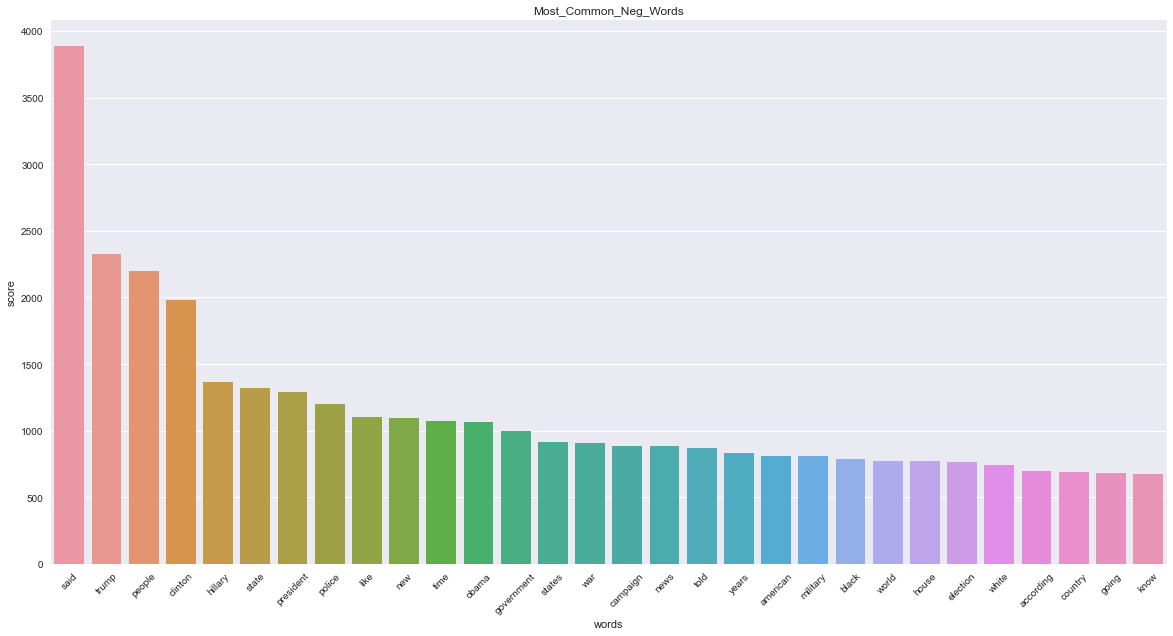

In [91]:
#plot with sea bone
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='score',data=negative_m_c_w_4_df)#we can use here positive and natural_m_c_4_df
plt.xticks(rotation=45)
plt.title("Most_Common_Neg_Words")
plt.show()

In [92]:
def plot_wordcloud(docx):
    my_wordcloud = WordCloud().generate(docx)
    plt.imshow(my_wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [97]:
pos_docx = ' '.join(positive_token)
neg_docx = ' '.join(negative_token)
nat_docx = ' '.join(natural_token)

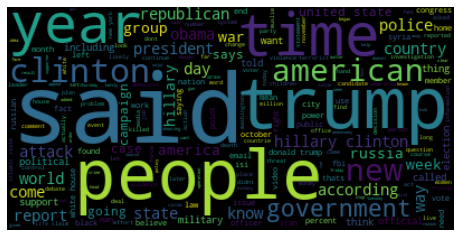

In [99]:
plot_wordcloud(neg_docx)